# We Rate Dog
### Data-wrangling project
Tien Duong  
08-Aug-2020

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering Data">Data Wrangling</a></li>
<li><a href="#Assess the Data">Assess the Data</a></li>
<li><a href="#Clean the Data">Clean the Data</a></li>
<li><a href="#Analysis">Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

*Nothing more interesting than to analyze human's longest best companion. By using datas collected from a twitter page `WeRateDog` twitter's archives, this data handed down as a starting point aim to for the current project. The aim for this project is to demonstrate my skill in data wrangling. The structure procecure in this project will contain of asessing, storing, analyzing, and visualizing the data.*

*`weratedog` is a twitter page with millions of followers. The page share and rate video and picture of dogs. The files collected from this page are `twitter_archive_enhanced.csv`, `image_predictions.tsv`, and `tweet_json.txt`. The property of this dataset consist of 5000+ tweets but not all are dogs rating, some of the tweet are retweets. One unique about the rating of this `weratedog` page is the rating system which where the numerators are greater than the denominators.

In [1]:
# Installing the needed package
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline

<a id='Gahthering Data'></a>
## Gathering Data

In [2]:
# Using open and request to open the image-predictions file in tsv.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv', 'wb') as file:
    image = requests.get(url)
    file.write(image.content)
# Read the tsv file into pandas dataframe
image_prediction = pd.read_csv('image-predictions.tsv', delim_whitespace=True)

In [3]:
# API accessing using tweepy API

import tweepy

consumer_key = 'hOmOpuXwks9L8zWJCZFmHR1eX'
consumer_secret = 'Ys9NxQqHe8wLwe5YoN5lkk8AO8eeZAUGSv9lFCz1rMzNEE8v93'
access_token = '1291601114379374592-gtw5uV0g9ydTO8WiYVAugGAgcRyMGw'
access_secret = 'b6IaLdZLPC4urs5WHQwLU7nm15OpLiOtzpuz4g6Hkffor'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
# Reading in the twitter archives file into pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced copy.csv')

In [25]:
# Using twitter_archive tweet id to query line by line into a dictionary
Id = list(twitter_archive['tweet_id'])

data = {}

for tweets in Id:
    try:
        tweet_status = api.get_status(tweets, waitwait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        data [str(tweets)] = tweet_status._json
    except:
        print('Error:', tweets)

Error: 888202515573088257
Error: 873697596434513921
Error: 872668790621863937
Error: 872261713294495745
Error: 869988702071779329
Error: 866816280283807744
Error: 861769973181624320
Error: 856602993587888130
Error: 851953902622658560
Error: 845459076796616705
Error: 844704788403113984
Error: 842892208864923648
Error: 837366284874571778
Error: 837012587749474308
Error: 829374341691346946
Error: 827228250799742977
Error: 812747805718642688
Error: 802247111496568832
Error: 779123168116150273
Error: 775096608509886464
Error: 771004394259247104
Error: 770743923962707968
Error: 759566828574212096


Rate limit reached. Sleeping for: 742


Error: 754011816964026368
Error: 680055455951884288


Rate limit reached. Sleeping for: 776


In [26]:
# Create tweet_json text file with the new dictionary
with open('tweet_json.txt', 'w') as f:
    json.dump(data, f)

In [6]:
# Extracting the columns of interest and file it into a list
with open('tweet_json.txt') as file:
    data = json.load(file)
df_list = []

for ID_tweet in data.keys():
    retweet = data[ID_tweet]['retweet_count']
    favorite = data[ID_tweet]['favorite_count']
    df_list.append({'ID': ID_tweet,
                    'retweet': retweet,
                   'favorites ': favorite})

In [7]:
# Using the newly made list and insert it into pandas DataFrame
retweet_favorite = pd.DataFrame(df_list)

<a id='Assess the Data'></a>
## Assess the Data
   After extraction of the `image_prediction`, `twitter_archive`, and `retweet_favorite` and stored stored into pandas dataframe for the next step in this data analysis. The data assessment will consist of two main elements of focus,looking for `quality` and `tidiness` inside each dataset. Quality and tidiness data assessment is to look through data contents using either visual or programtic.
   
   Quality: Make observation of data content for missing , confusing data description and etc...
   
   Tidiness: Look for through the structulize and properties of the dataset for correction

### Visual assessment

In [8]:
# Image prediction
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1079,717841801130979328,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
992,708109389455101952,https://pbs.twimg.com/media/CdO1u9vWAAApj2V.jpg,1,Staffordshire_bullterrier,0.516106,True,American_Staffordshire_terrier,0.236075,True,kelpie,0.069750,True
1671,813096984823349248,https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg,1,Great_Dane,0.128056,True,Boston_bull,0.117003,True,kelpie,0.086964,True
738,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,car_mirror,0.997121,False,seat_belt,0.000375,False,beagle,0.000216,True
818,692901601640583168,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1,soft-coated_wheaten_terrier,0.403496,True,cocker_spaniel,0.135164,True,golden_retriever,0.088719,True
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Siamese_cat,0.383937,False,Chihuahua,0.160274,True,giant_panda,0.147745,False
1011,709449600415961088,https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg,2,Maltese_dog,0.780187,True,Dandie_Dinmont,0.074429,True,Norfolk_terrier,0.033776,True
988,707776935007539200,https://pbs.twimg.com/media/CdKHWimWoAABs08.jpg,1,miniature_pinscher,0.890426,True,toy_terrier,0.051335,True,Chihuahua,0.018015,True
534,676936541936185344,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,1,Chesapeake_Bay_retriever,0.545286,True,Norwegian_elkhound,0.081482,True,space_heater,0.047391,False
1680,813800681631023104,https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg,1,malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True


In [9]:
# twitter archive
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,None,None,None,puppo
2153,669661792646373376,NaN,NaN,2015-11-25 23:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669661792...,5,10,a,None,None,None,None
1828,676263575653122048,NaN,NaN,2015-12-14 04:52:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All this pupper wanted to do was go skiing. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676263575...,10,10,None,None,None,pupper,None
1602,685973236358713344,NaN,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,None,None,None,None
405,823939628516474880,NaN,NaN,2017-01-24 17:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823939628...,12,10,Cash,None,None,None,None
527,808733504066486276,NaN,NaN,2016-12-13 18:01:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper in a onesie. Quite pupset abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808733504...,12,10,None,None,None,pupper,None
1714,680440374763077632,NaN,NaN,2015-12-25 17:30:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680440374...,11,10,None,None,None,None,None
1180,719339463458033665,NaN,NaN,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lucy and Sophie. They think they'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463...,10,10,Lucy,None,None,None,None
1555,688894073864884227,NaN,NaN,2016-01-18 01:22:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hamrick. He's covered in corn flakes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688894073...,7,10,Hamrick,None,None,pupper,None
466,817171292965273600,NaN,NaN,2017-01-06 00:49:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tebow. He kindly requests that you put...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817171292...,13,10,Tebow,None,None,None,None


In [10]:
# retweet favorite
retweet_favorite.sample(20)

,ID,retweet,favorites
1793,676593408224403456,2081,4411
504,809920764300447744,3972,15680
1363,700505138482569216,557,2256
742,778286810187399168,3300,10398
2085,670444955656130560,1875,6396
2270,667119796878725120,122,313
1942,673342308415348736,541,1211
432,819006400881917954,19013,45462
691,785170936622350336,4868,12116
1575,686034024800862208,1125,3039


### Programmatic assessment

In [11]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
retweet_favorite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2331 non-null   object
 1   retweet     2331 non-null   int64 
 2   favorites   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [16]:
retweet_favorite.describe()

,retweet,favorites
count,2331.000000,2331.000000
mean,2665.983698,7478.497211
std,4508.528533,11610.380504
min,1.000000,0.000000
25%,540.500000,1300.500000
50%,1246.000000,3249.000000
75%,3099.000000,9156.000000
max,76636.000000,154350.000000


In [17]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1009,747512671126323200,NaN,NaN,2016-06-27 19:31:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys pls stop sending actual sharks. It's too ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747512671...,10,10,None,None,None,None,None
360,829861396166877184,NaN,NaN,2017-02-10 01:15:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She already knows she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829861396...,12,10,Mia,None,None,None,None
26,886983233522544640,NaN,NaN,2017-07-17 16:17:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maya. She's very shy. Rarely leaves he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,None,None,None,None
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None
692,787111942498508800,NaN,NaN,2016-10-15 02:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carl. He's very powerfu...,7.529324e+17,4.196984e+09,2016-07-12 18:27:35 +0000,"https://vine.co/v/OEppMFbejFz,https://vine.co/...",12,10,Carl,None,None,None,None
1412,698953797952008193,NaN,NaN,2016-02-14 19:35:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet CeCe. She wanted to take a selfie before ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698953797...,11,10,CeCe,None,None,None,None
894,759197388317847553,NaN,NaN,2016-07-30 01:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,None,None,None,None
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209...,8,10,Edmund,None,None,pupper,None
547,805520635690676224,NaN,NaN,2016-12-04 21:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke the Wonder Dog. He never let that...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805520635...,13,10,Zeke,None,None,None,None
206,852672615818899456,NaN,NaN,2017-04-13 23:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. She's never tasted a stick so s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852672615...,12,10,Aspen,None,None,None,None


In [18]:
# Checking the names under name column
twitter_archive.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [19]:
# lowercase under name column
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [20]:
# Inconsistent rating numbers
twitter_archive[(twitter_archive['rating_numerator'] > 20) & (twitter_archive['rating_denominator'] > 20)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


<a id='Clean the Data'></a>
## Issues

### Tidiness
    - Float in reply status_id (archive)
    - Float in reply user_id (archive)
    - Float in retweeted_status_user_id (archive)
    - Float in retweeted_status_id (archive)
    - Timestamp column in string (archive)
    - Retweet stat timestamp in string (archvie)
    - floofer, doggo, puppo, pupper columns belong in one column (archive)
    - Tweet_image and retweet and favorites share dataframe (favorites)

### Quality
    - Upper and lower in p1, p2, and p3 columns (image)
     - column name for p1,p2 not clear (image)
    - Retweet status_id in decimal (archive)
    - Retweet status_user_id in decimal (archive)
    - Rating numerator max is with index 979 (archive)
    - Missing data in in_reply_to_status_id and in_reply_to_user_id (archive)
    - Missing data in retweet status id, user_id, timestamp (archive)
    - Missing data in expanded urls (archive)
    - Under name column, names lowercase is not actual name (archive)
    - Rating denominator and numerator are inconsistent (archive)
    - Source code difficult to comprehend

In [21]:
# Make copy before cleaning
clean_archive = twitter_archive.copy()
clean_image = image_prediction.copy()
clean_favorites = retweet_favorite.copy()

# Cleaning
## Tidiness

#### Define:
         The missing data are at large in these columns, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. Therefore, we will drop these columns since we dont need them to complete our analysis because our focus of this project is dog's breed rating.

### Code

In [22]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
# Dropping the columns
clean_archive.drop(columns=['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                           'retweeted_status_timestamp'], inplace=True)


In [24]:
# Dropping the missing rows with missing data in expanded_urls column
clean_archive.dropna(inplace=True)

### Test

In [25]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   doggo               2297 non-null   object
 9   floofer             2297 non-null   object
 10  pupper              2297 non-null   object
 11  puppo               2297 non-null   object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


#### Define
    Timestamp data type is in string. We will need to convert the data type to timestamp.

#### Code

In [26]:
clean_archive.timestamp = pd.to_datetime(clean_archive.timestamp)

In [27]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                2297 non-null   object             
 8   doggo               2297 non-null   object             
 9   floofer             2297 non-null   object             
 10  pupper              2297 non-null   object             
 11  puppo               2297 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define
    The dog's stage columns need to organize to under one single column by using melt function. Also we willing filling out the None values inside the column.

#### Code

In [28]:
dog = ['doggo','pupper', 'floofer', 'puppo' ]
for stage in dog:
        clean_archive[stage] = clean_archive[stage].replace('None', '')

In [29]:
clean_archive = pd.melt(clean_archive, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
                                       'rating_numerator', 'rating_denominator',
                                       'name'], var_name ='stage')
clean_archive.drop(columns='value', axis=1, inplace=True)


#### Test

In [30]:
clean_archive.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
7774,757354760399941633,2016-07-24 23:20:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",https://twitter.com/dog_rates/status/757354760...,8,10,Devón,puppo
7312,819238181065359361,2017-01-11 17:42:57+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,puppo
5585,746369468511756288,2016-06-24 15:48:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,https://twitter.com/dog_rates/status/746369468...,9,10,an,pupper
7263,825876512159186944,2017-01-30 01:21:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,puppo
6063,691416866452082688,2016-01-25 00:26:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I present to you... Dog Jesus. 13/10 (he could...,https://twitter.com/dog_rates/status/691416866...,13,10,None,pupper


#### Define
##### Tidiness and quality cleaning
    Combinding the clean_archive, clean_favorites, and clean_image dataframe all together by using merge.

In [31]:
# Changing the name of Id column to tweet_id
# Changing the Datatype for the ID column
clean_image.rename(columns={'ID': 'tweet_id'}, inplace=True)
clean_image.tweet_id = clean_image.tweet_id.astype(str)
clean_favorites.rename(columns={'ID': 'tweet_id'}, inplace=True)
clean_favorites.tweet_id = clean_favorites.tweet_id.astype(str)
clean_archive.tweet_id = clean_archive.tweet_id.astype(str)

In [32]:
# Merging all 3 dataframe together fall under tweet_id
clean_tweets = pd.merge(clean_archive, clean_favorites, how='inner', on='tweet_id')
clean_tweets = pd.merge(clean_tweets, clean_image, how='inner', on='tweet_id')

#### Test

In [33]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8236 entries, 0 to 8235
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8236 non-null   object             
 1   timestamp           8236 non-null   datetime64[ns, UTC]
 2   source              8236 non-null   object             
 3   text                8236 non-null   object             
 4   expanded_urls       8236 non-null   object             
 5   rating_numerator    8236 non-null   int64              
 6   rating_denominator  8236 non-null   int64              
 7   name                8236 non-null   object             
 8   stage               8236 non-null   object             
 9   retweet             8236 non-null   int64              
 10  favorites           8236 non-null   int64              
 11  jpg_url             8236 non-null   object             
 12  img_num             8236 non-null 

In [34]:
clean_tweets.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
113,886366144734445568,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,floofer,2848,...,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
3939,717047459982213120,2016-04-04 17:53:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio (pronounced Baxter). He's a Ben...,https://twitter.com/dog_rates/status/717047459...,12,10,Flávio,puppo,1884,...,1,golden_retriever,0.983548,True,Labrador_retriever,0.012185,True,cocker_spaniel,0.002412,True
2776,761745352076779520,2016-08-06 02:06:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Guys.. we only rate dogs. Pls don't send any m...,https://twitter.com/dog_rates/status/761745352...,11,10,None,doggo,859,...,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False
1087,831309418084069378,2017-02-14 01:09:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,https://twitter.com/dog_rates/status/831309418...,12,10,Scooter,puppo,2449,...,1,Doberman,0.369389,True,kelpie,0.132449,True,Labrador_retriever,0.074727,True
6814,672594978741354496,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,pupper,582,...,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True
2961,756288534030475264,2016-07-22 00:43:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,https://twitter.com/dog_rates/status/756288534...,12,10,None,floofer,17561,...,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
5470,684222868335505415,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,pupper,1339,...,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
4446,704819833553219584,2016-03-02 00:05:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chesterson. He's a Bolivian Scoop Dog....,https://twitter.com/dog_rates/status/704819833...,7,10,Chesterson,pupper,967,...,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,0.000206,False
5666,681523177663676416,2015-12-28 17:12:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,pupper,5644,...,1,Norfolk_terrier,0.205067,True,German_shepherd,0.160439,True,chow,0.156234,True
2093,790987426131050500,2016-10-25 18:44:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She has a cowboy hat on her nos...,https://twitter.com/dog_rates/status/790987426...,12,10,Misty,floofer,2152,...,1,cocker_spaniel,0.349195,True,flat-coated_retriever,0.309535,True,Newfoundland,0.104768,True


## Quality Cleaning

#### Define
    Convert all letters in p1,p2,p3 columns into capitalize dog's name for consistency. Also, will change the column name for readability.

#### Code

In [35]:
# Changing columns names for p1, p2, and p3 including the feature columns
clean_tweets.rename(columns={'p1': 'prediction_1', 'p2':'prediction_2', 'p3':'prediction_3',
                            'p1_conf': 'confidence_prediction_1', 'p2_conf': 'confidence_prediction_2', 'p3_conf': 'confidence_prediction_3',
                            'p1_dog': 'dog_1', 'p2_dog': 'dog_2', 'p3_dog': 'dog_3',
                            'favorites ' : 'favorites'}, inplace=True)

In [36]:
# Run a for loop into prediction columns to apply capitalize the names
mask = ['prediction_1','prediction_2', 'prediction_3']
for pred in mask:
        clean_tweets[pred] = clean_tweets[pred].str.capitalize()

#### Test

In [37]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8236 entries, 0 to 8235
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 8236 non-null   object             
 1   timestamp                8236 non-null   datetime64[ns, UTC]
 2   source                   8236 non-null   object             
 3   text                     8236 non-null   object             
 4   expanded_urls            8236 non-null   object             
 5   rating_numerator         8236 non-null   int64              
 6   rating_denominator       8236 non-null   int64              
 7   name                     8236 non-null   object             
 8   stage                    8236 non-null   object             
 9   retweet                  8236 non-null   int64              
 10  favorites                8236 non-null   int64              
 11  jpg_url                  8236 

#### Define
    Inconsistence rating scale of numerator and denominator, will track down and removes these inconsistency.

#### Code

In [38]:
# Removes all rows that over 20 rating point scale both in denominator and numerator
clean_tweets.drop(clean_tweets.loc[(clean_tweets['rating_numerator']>= 20) & (clean_tweets['rating_denominator'] >= 20)]
.index, inplace=True)

#### Test

In [39]:
clean_tweets.query("rating_numerator >= 20 and rating_denominator >= 20")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet,...,img_num,prediction_1,confidence_prediction_1,dog_1,prediction_2,confidence_prediction_2,dog_2,prediction_3,confidence_prediction_3,dog_3


#### Define
    Replace out all lowercase names under name column. The names that are lowercase under name column are not improper name or human entry errors.

#### code

In [40]:
# Create a mask which contain the rows with lowercase names
# Convert the list of name into a list and use the name to interate over dataframe to replace names with None
mask = clean_tweets.loc[(clean_tweets['name'].str.islower())]
mask = list(mask['name'])
for entry in mask:
    clean_tweets['name'].replace(entry, 'None', inplace=True)

#### Test

In [41]:
clean_tweets.loc[(clean_tweets['name'].str.islower())]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet,...,img_num,prediction_1,confidence_prediction_1,dog_1,prediction_2,confidence_prediction_2,dog_2,prediction_3,confidence_prediction_3,dog_3


#### Define
    Use option.display to change format display for to 2 decimal for all floats inside dataset. Also use rename method to changes the name for jpg_url and img_num columns

#### Code

In [42]:
# Set default to all float number display 2 decimal using option.display
pd.options.display.float_format = "{:,.2f}".format
clean_tweets[['confidence_prediction_2', 'confidence_prediction_3']]
# Change jpg_url and img_num column name
clean_tweets.rename(columns={'jpg_url': 'image_url', 'img_num':'image_number'}, inplace=True)

#### test

In [43]:
# check random sample and expand display for columns and width 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
clean_tweets.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet,favorites,image_url,image_number,prediction_1,confidence_prediction_1,dog_1,prediction_2,confidence_prediction_2,dog_2,prediction_3,confidence_prediction_3,dog_3
763,846514051647705089,2017-03-28 00:07:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,puppo,11223,43708,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,Golden_retriever,0.65,True,Leonberg,0.07,True,Norfolk_terrier,0.05,True
4372,706291001778950144,2016-03-06 01:31:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're just relaxin and having a swell ti...,https://twitter.com/dog_rates/status/706291001...,11,10,None,doggo,472,1669,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,1,Border_terrier,0.59,True,Bull_mastiff,0.16,True,Staffordshire_bullterrier,0.11,True
8057,666781792255496192,2015-11-18 00:55:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,https://twitter.com/dog_rates/status/666781792...,10,10,None,floofer,177,361,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,Italian_greyhound,0.62,True,Weimaraner,0.15,True,Vizsla,0.09,True
1504,815390420867969024,2017-01-01 02:53:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from the squad! 13/10 for all h...,https://twitter.com/dog_rates/status/815390420...,13,10,None,doggo,3822,10410,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,Restaurant,0.28,False,Toyshop,0.09,False,Paper_towel,0.05,False
6166,676440007570247681,2015-12-14 16:34:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,https://twitter.com/dog_rates/status/676440007...,11,10,None,pupper,639,1670,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.58,True,Toy_poodle,0.13,True,Shih-tzu,0.09,True
7310,670411370698022913,2015-11-28 01:18:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's ready for his first day of ...,https://twitter.com/dog_rates/status/670411370...,12,10,Scooter,pupper,838,1920,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1,Maltese_dog,0.58,True,Miniature_schnauzer,0.06,True,Toy_poodle,0.06,True
6120,676776431406465024,2015-12-15 14:50:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",https://twitter.com/dog_rates/status/676776431...,10,10,None,doggo,1961,4852,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,Doormat,0.20,False,Dishwasher,0.19,False,Microwave,0.04,False
3923,717841801130979328,2016-04-06 22:29:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,https://twitter.com/dog_rates/status/717841801...,11,10,Barclay,puppo,592,2411,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.92,True,English_springer,0.07,True,Bath_towel,0.00,False
5525,683498322573824003,2016-01-03 04:01:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Griffin. He's desperate for both a phy...,https://twitter.com/dog_rates/status/683498322...,11,10,Griffin,floofer,947,3126,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,1,Airedale,0.95,True,Irish_terrier,0.03,True,Lakeland_terrier,0.02,True
7876,667534815156183040,2015-11-20 02:47:56+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,doggo,494,772,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,1,Pembroke,0.44,True,Cardigan,0.31,True,Cocker_spaniel,0.03,True


In [44]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8184 entries, 0 to 8235
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 8184 non-null   object             
 1   timestamp                8184 non-null   datetime64[ns, UTC]
 2   source                   8184 non-null   object             
 3   text                     8184 non-null   object             
 4   expanded_urls            8184 non-null   object             
 5   rating_numerator         8184 non-null   int64              
 6   rating_denominator       8184 non-null   int64              
 7   name                     8184 non-null   object             
 8   stage                    8184 non-null   object             
 9   retweet                  8184 non-null   int64              
 10  favorites                8184 non-null   int64              
 11  image_url                8184 

### Define
    Drop duplicated rows using duplicated method and keep the first occurence 

#### Code

In [45]:
# Dropping duplicated rows using duplicated method
clean_tweets = clean_tweets[~clean_tweets.tweet_id.duplicated(keep='first')]

#### Test

In [46]:
# Test if any duplicated rows in dataframe, If True, there is duplicated.
clean_tweets.duplicated().value_counts()

False    2046
dtype: int64

### Define
    Replace values in the source columns to which ever devices the tweeter's user sent out.

#### Code

In [47]:
# Use replace to transcript sources code into more reader friendly
clean_tweets['source'] =  clean_tweets['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iphone')
clean_tweets['source'] = clean_tweets['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
clean_tweets['source'] = clean_tweets['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [48]:
# Use value_counts to test for values under source column
clean_tweets.source.value_counts()

Twitter for iphone    2006
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

## Store

In [49]:
# Save clean data to a master csv
clean_tweets.to_csv('twitter_archive_master.csv')

<a id='Analysis'></a>
## Analysis

    - Numbers of correct prediction for dog breed?
    - Distribution of the dog stages throughout DataFrame
    - Test for correlation between retweet_count and favorites_count columns
    - Analysis on the classification of dog's breed result

In [50]:
tweet_analysis = pd.read_csv('twitter_archive_master.csv')

In [51]:
tweet_analysis.sample(10)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet,favorites,image_url,image_number,prediction_1,confidence_prediction_1,dog_1,prediction_2,confidence_prediction_2,dog_2,prediction_3,confidence_prediction_3,dog_3
156,624,854120357044912130,2017-04-17 23:52:16+00:00,Twitter for iphone,Sometimes you guys remind me just how impactfu...,https://twitter.com/dog_rates/status/854120357...,14,10,None,doggo,7132,30885,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,4,Black-and-tan_coonhound,0.85,True,Doberman,0.05,True,Bluetick,0.02,True
1590,6412,674767892831932416,2015-12-10 01:49:36+00:00,Twitter for iphone,This pup was carefully tossed to make it look ...,https://twitter.com/dog_rates/status/674767892...,12,10,None,doggo,746,1747,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,Shower_curtain,0.24,False,Sarong,0.09,False,Kimono,0.06,False
1890,7612,668815180734689280,2015-11-23 15:35:39+00:00,Twitter for iphone,This is a wild Toblerone from Papua New Guinea...,https://twitter.com/dog_rates/status/668815180...,7,10,None,doggo,247,529,https://pbs.twimg.com/media/CUgb21RXIAAlff7.jpg,1,Redbone,0.46,True,Italian_greyhound,0.27,True,Miniature_pinscher,0.11,True
1360,5484,684177701129875456,2016-01-05 01:00:50+00:00,Twitter for iphone,This is Kulet. She's very proud of the flower ...,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,doggo,655,1991,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,1,Chow,0.33,True,German_shepherd,0.16,True,Golden_retriever,0.14,True
1220,4916,693629975228977152,2016-01-31 03:00:47+00:00,Twitter for iphone,This pupper is afraid of its own feet. 12/10 w...,https://twitter.com/dog_rates/status/693629975...,12,10,None,doggo,779,2407,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,Pug,0.84,True,French_bulldog,0.07,True,Boston_bull,0.04,True
206,824,842535590457499648,2017-03-17 00:38:32+00:00,Twitter for iphone,This is Winnie. She lost her body saving a chi...,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,doggo,3437,17851,https://pbs.twimg.com/media/C7FJpgVW4AIDzi6.jpg,1,Pembroke,0.69,True,Cardigan,0.31,True,Basenji,0.00,True
18,72,888554962724278272,2017-07-22 00:23:06+00:00,Twitter for iphone,This is Ralphus. He's powering up. Attempting ...,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,doggo,3118,18305,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.70,True,Eskimo_dog,0.17,True,Malamute,0.11,True
1516,6112,676819651066732545,2015-12-15 17:42:34+00:00,Twitter for iphone,Watch out Airbud. This pupper is also good at ...,https://twitter.com/dog_rates/status/676819651...,12,10,None,doggo,642,1763,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,Rain_barrel,0.63,False,Barrel,0.14,False,Labrador_retriever,0.04,True
1307,5264,687476254459715584,2016-01-14 03:28:06+00:00,Twitter for iphone,This is Curtis. He's a fluffball. 11/10 would ...,https://twitter.com/dog_rates/status/687476254...,11,10,Curtis,doggo,523,1956,https://pbs.twimg.com/media/CYpoAZTWEAA6vDs.jpg,1,Wood_rabbit,0.70,False,Angora,0.19,False,Hare,0.11,False
160,640,853299958564483072,2017-04-15 17:32:18+00:00,Twitter for iphone,This is Rumpole. He'll be your Uber driver thi...,https://twitter.com/dog_rates/status/853299958...,13,10,Rumpole,doggo,3419,14995,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,Grille,0.65,False,Beach_wagon,0.11,False,Convertible,0.09,False


### 1. Numbers of correct prediction for dogs breed.

In [52]:
# Create a new DataFrame which contained that columns tracksm correct and incorrect image prediction 
correct_breed = tweet_analysis[['dog_1','dog_2','dog_3']].apply(pd.Series.value_counts)
correct_breed

,dog_1,dog_2,dog_3
True,1509,1529,1476
False,537,517,570


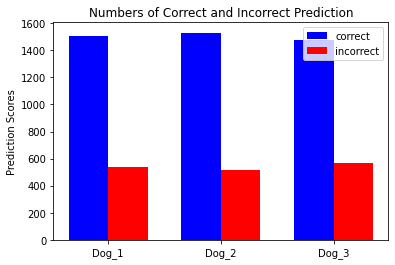

In [53]:
width = 0.35
labels = ['Dog_1', 'Dog_2', 'Dog_3']
correct = correct_breed.iloc[0].tolist()
incorrect = correct_breed.iloc[1].tolist()
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, correct, width, label='correct',color='b')
rects2 = ax.bar(x + width/2, incorrect, width, label='incorrect', color='r')

ax.set_ylabel('Prediction Scores')
ax.set_title('Numbers of Correct and Incorrect Prediction')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

In [54]:
# Sum up the total number of correct and incorrect prediction and create a new column
correct_breed['total'] = correct_breed.sum(axis=1)
correct_breed

,dog_1,dog_2,dog_3,total
True,1509,1529,1476,4514
False,537,517,570,1624


In [55]:
# Percentage of correction
correct_breed.total[1]/ sum(correct_breed.total)

0.7354187031606386

The percentage of total correct prediction is 0.735, which is bases on the total amount of `True` under all 3 dog columns divided by the combined numbers of `True` and `False`. This mean there is a 3/4 chances of the image is correctly predicted by the Neural network.

### 2. Which dog breed appeared the most according the prediction?

In [91]:
# Extract and combined the prediction columns into a new DataFrame then sorted out top 10 
breed = tweet_analysis[['prediction_1', 'prediction_2', 'prediction_3']].apply(pd.Series.value_counts)
breed['total'] = breed.sum(axis=1)
breed.sort_values('total', ascending=False, inplace=True)
breed = breed.head(10)
breed

,prediction_1,prediction_2,prediction_3,total
Golden_retriever,148.00,88.00,47.00,283.00
Labrador_retriever,94.00,104.00,79.00,277.00
Chihuahua,81.00,43.00,58.00,182.00
Pembroke,88.00,27.00,27.00,142.00
Cardigan,19.00,74.00,23.00,116.00
Pomeranian,38.00,41.00,28.00,107.00
Toy_poodle,38.00,37.00,29.00,104.00
Pug,57.00,17.00,22.00,96.00
Chow,44.00,20.00,31.00,95.00
French_bulldog,25.00,40.00,26.00,91.00


Text(0.5, 1.0, "Top 10 Predicted dog's breed")

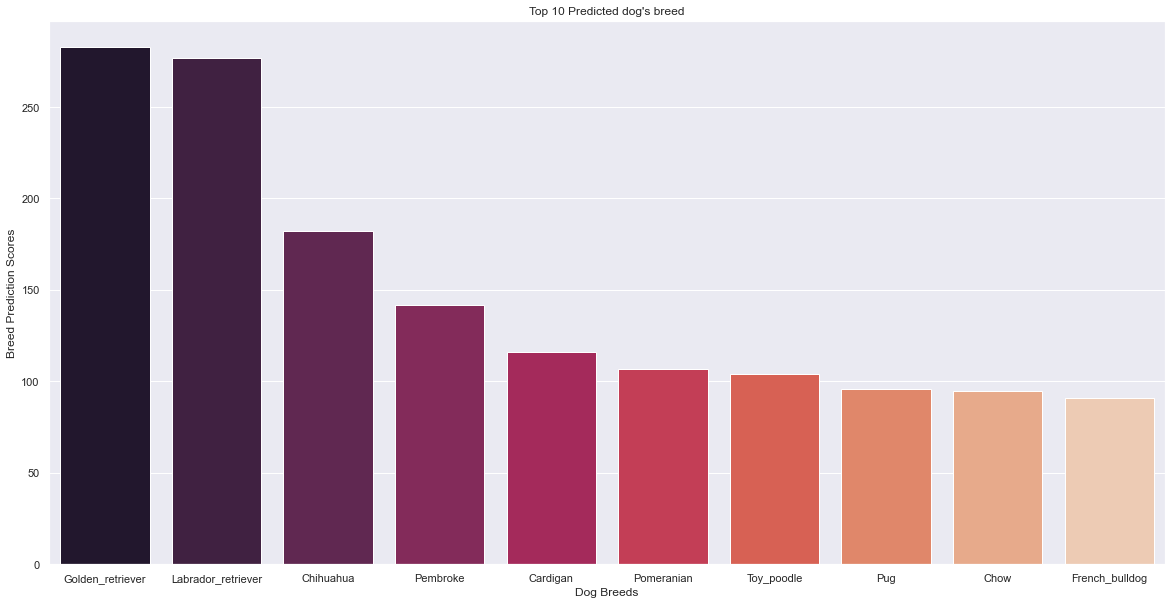

In [57]:
# Visualize bar chart top 10 predicted dog breed
x = breed.index.tolist()
y = breed.total.tolist()
sns.set(style='darkgrid')
plt.figure(figsize=(20,10));
sns.barplot(x=x, y=y, palette='rocket');
plt.xlabel('Dog Breeds')
plt.ylabel('Breed Prediction Scores')
plt.title("Top 10 Predicted dog's breed")

#### Summary
According to the prediction, the most predicted type of dog breed is Golden retriever. This make sense because Golden retrivever is very high energy and friendly type of breed, they are easy to train and very well behave, and their most distintive trait is their golden long fur coat.

In [58]:
tweet_analysis.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet,favorites,image_url,image_number,prediction_1,confidence_prediction_1,dog_1,prediction_2,confidence_prediction_2,dog_2,prediction_3,confidence_prediction_3,dog_3
0,0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,7588,35824,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.10,False,Bagel,0.09,False,Banana,0.08,False
1,4,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,5622,30918,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,Papillon,0.07,True
2,8,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,3720,23272,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,Malamute,0.08,True,Kelpie,0.03,True
3,12,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,7758,39088,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.17,False,Labrador_retriever,0.17,True,Spatula,0.04,False
4,16,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,8362,37330,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True


### 3.  What are the relationship between retweet and favorites?

In [59]:
tweet_analysis['favorites'].describe()

count     2,046.00
mean      7,924.41
std      11,962.84
min           0.00
25%       1,495.00
50%       3,490.50
75%       9,901.50
max     154,350.00
Name: favorites, dtype: float64

In [60]:
tweet_analysis['retweet'].describe()

count    2,046.00
mean     2,558.13
std      4,464.57
min         11.00
25%        545.00
50%      1,206.00
75%      2,943.00
max     76,636.00
Name: retweet, dtype: float64

In [61]:
data = tweet_analysis[['retweet', 'favorites']]
correlation = data.corr(method='pearson')
correlation

,retweet,favorites
retweet,1.00,0.86
favorites,0.86,1.00


In [62]:
tweet_analysis.query("favorites == 0")

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet,favorites,image_url,image_number,prediction_1,confidence_prediction_1,dog_1,prediction_2,confidence_prediction_2,dog_2,prediction_3,confidence_prediction_3,dog_3
32,128,885311592912609280,2017-07-13 01:35:06+00:00,Twitter for iphone,RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,doggo,16643,0,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.91,True,Seat_belt,0.06,False,Pug,0.01,True
67,268,877611172832227328,2017-06-21 19:36:23+00:00,Twitter for iphone,RT @rachel2195: @dog_rates the boyfriend and h...,https://twitter.com/rachel2195/status/87685077...,14,10,None,doggo,72,0,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.36,True,Golden_retriever,0.20,True,Irish_terrier,0.11,True
107,428,867072653475098625,2017-05-23 17:40:04+00:00,Twitter for iphone,RT @rachaeleasler: these @dog_rates hats are 1...,https://twitter.com/rachaeleasler/status/86501...,13,10,None,doggo,110,0,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,0.35,True,Papillon,0.21,True,Pekinese,0.11,True
130,520,860924035999428608,2017-05-06 18:27:40+00:00,Twitter for iphone,RT @tallylott: h*ckin adorable promposal. 13/1...,https://twitter.com/tallylott/status/860914485...,13,10,None,doggo,744,0,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,Envelope,0.93,False,Oscilloscope,0.01,False,Paper_towel,0.01,False
167,668,851861385021730816,2017-04-11 18:15:55+00:00,Twitter for iphone,RT @eddie_coe98: Thanks @dog_rates completed m...,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,doggo,19,0,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,Pencil_box,0.66,False,Purse,0.07,False,Pillow,0.04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2980,754874841593970688,2016-07-18 03:06:01+00:00,Twitter for iphone,RT @dog_rates: This is Rubio. He has too much ...,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,doggo,7833,0,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,Pug,0.27,True,Bull_mastiff,0.25,True,Bath_towel,0.12,False
760,3048,752309394570878976,2016-07-11 01:11:51+00:00,Twitter for iphone,RT @dog_rates: Everyone needs to watch this. 1...,https://twitter.com/dog_rates/status/675354435...,13,10,None,doggo,16096,0,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,Upright,0.30,False,Golden_retriever,0.18,True,Brittany_spaniel,0.16,True
1017,4088,711998809858043904,2016-03-21 19:31:59+00:00,Twitter for iphone,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,https://twitter.com/twitter/status/71199827977...,12,10,None,doggo,125,0,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,Comic_book,0.11,False,Kuvasz,0.06,True,Book_jacket,0.05,False
1950,7852,667550904950915073,2015-11-20 03:51:52+00:00,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12,10,None,doggo,31,0,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,Web_site,1.00,False,Vizsla,0.00,True,Collie,0.00,True


The correlation coefficient between retweet and favorites is 0.86. And there are 72 rows with zero favorites with high number of share. It's look like the favorites or like button was disabled.

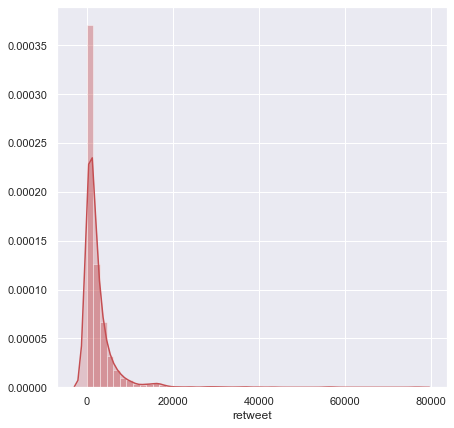

In [63]:
plt.subplots( figsize=(7, 7), sharex=True)
sns.distplot(tweet_analysis.retweet, kde_kws={"shade":True}, color="r");

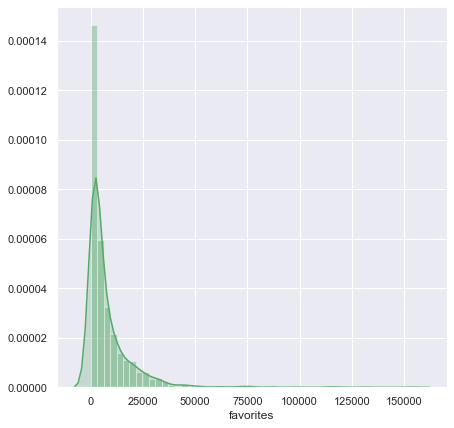

In [64]:
plt.subplots( figsize=(7, 7), sharex=True)
sns.distplot(tweet_analysis.favorites, kde_kws={"shade":True}, color="g");

Both of the graph above are skewed to the right, which mean both show relation with each other.

In [92]:
tweet_analysis.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet,favorites,image_url,image_number,prediction_1,confidence_prediction_1,dog_1,prediction_2,confidence_prediction_2,dog_2,prediction_3,confidence_prediction_3,dog_3
0,0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,7588,35824,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.10,False,Bagel,0.09,False,Banana,0.08,False
1,4,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,5622,30918,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,Papillon,0.07,True
2,8,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,3720,23272,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,Malamute,0.08,True,Kelpie,0.03,True
3,12,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,7758,39088,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.17,False,Labrador_retriever,0.17,True,Spatula,0.04,False
4,16,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,8362,37330,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True


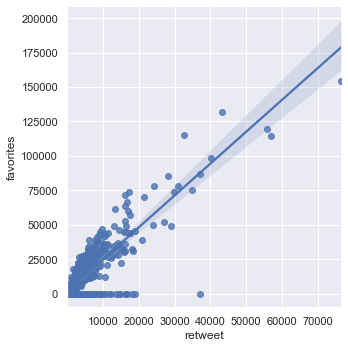

In [101]:
# Scatter plot and regression line of favorites and retweet
import seaborn as sns
sns.lmplot(x='retweet',y='favorites',data=tweet_analysis,fit_reg=True);

### 4. Which sources was used the most for tweeting?

In [65]:
# Using Value_counts to find values under source column and convert into dataframe
sources = pd.DataFrame(tweet_analysis.source.value_counts())
sources

,source
Twitter for iphone,2006
Twitter Web Client,30
TweetDeck,10


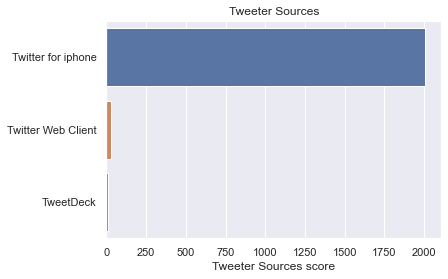

In [66]:
# plotting the sources score using barplot
sns.barplot(data=sources, x=sources['source'], y=sources.index);
plt.xlabel('Tweeter Sources score');
plt.title('Tweeter Sources');

Base on the barplot above, the most popular sources to sent tweets from is by using twitter iphone app. This make sense because mobile phone is much more convienece for usage to check news.

<a id='conclusions'></a>
## Conclusion

Base on the dataset, after cleaning, wrangling, analyzing, and visualizing. The important keys take away from this dataset are golden retreiver is either very popular dog breed or more accurately to predict by the neural network. The image prediction rates is approximately 73% correct. And Dogs with high favorites rating is also high have high number of retweets. 